In [47]:
import scipy.integrate as integr            
import numpy as np                          
import matplotlib.pyplot as plt
from scipy.signal import argrelextrema
import pylab

colors = ["#00FFFF",                # Azure
          "#0000FF",                # Blue
          "#FF0000",                # Red
          "#00FF00",                # Green
          "#D2691E",                #
          "#AAA662",
          "#9A0EEA",
          "#808000",
          "#FFA500",
          "#9ACD32",
          "#ED0DD9",
          "#FC5A50",
          "#929591",
          "#029386",
          "#C79FEF",
          "#FAC205",
          "#6E750E",
          "#06C2AC",
          "#CD5C5C",                # IndianRed
          "#A52A2A",                # Brown
          "#7B68EE",                # MediumState_blue
          "#4682B4",                # SteelBlue
          "#800000"                # Maroon
          ]
colors = 10*colors

def mesh(x, y):
    general = []
    for i in range(len(x)):
        for j in range(len(y)):
            local = []
            local.append(x[i])
            local.append(y[j])
            general.append(local)
    return general

stat_dpi = 90
rect_pics = (7, 7)
dynamics_pics = (14, 7)

In [28]:
def plotTS(y1, y2, time):
    fig = plt.figure(facecolor="white", figsize = dynamics_pics, dpi=stat_dpi)
    plt.plot(time, y1, c = "b", label = "y1")
    plt.plot(time, y2, c = "r", label = "y2")
    plt.xlabel("time")
    plt.ylabel("y1, y2")  
    plt.title("Численное решение компонент системы")
    plt.legend()
    plt.grid(True)
    plt.show()
    
def plotFP(y1, y2, centers = None, starts = None, color = "b"):
    fig = plt.figure(facecolor="white", figsize = rect_pics, dpi=stat_dpi)
    plt.plot(y1, y2, c = color)
    if centers is not None:
        for i in centers:
            plt.scatter(i[0], i[1])
    if starts is not None:
        for i in starts:
            plt.scatter(i[0], i[1])
    plt.xlabel("y1")
    plt.ylabel("y2")  
    plt.title("Фазовый портрет системы")
    plt.legend()
    plt.grid(True)
    plt.show() 

In [62]:
def f(y, t, r = 1, K = 7, w = 0.2, s = 0.1, J = 0.15, D = 1.5):
    N1, N2 = y
    dN1 = r * N1 - r * N1**2 / K - w * N1 * N2 / (D + N1)
    dN2 = s * N2 - s * J * N2**2 / N1
    return [dN1, dN2]

def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)

def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

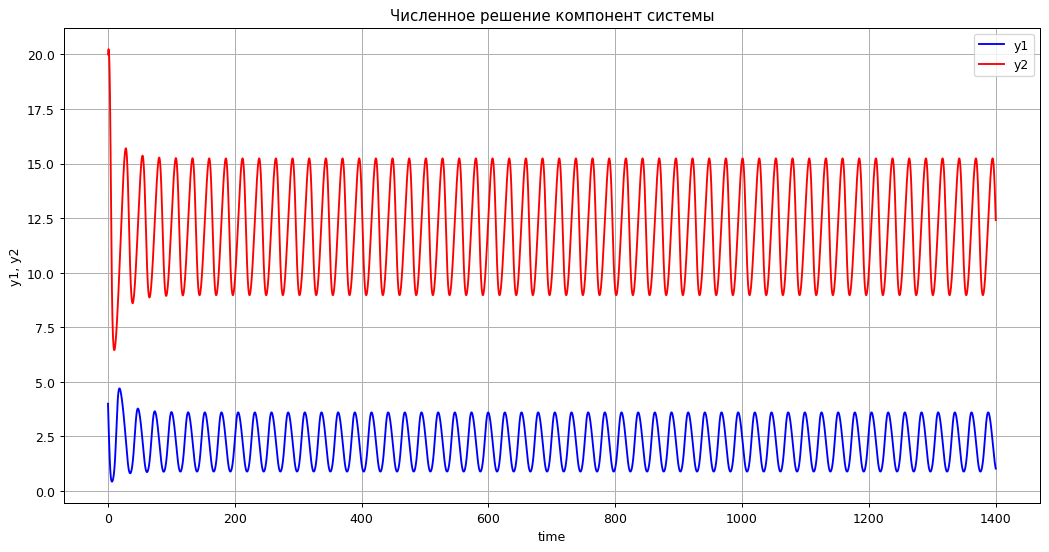

No handles with labels found to put in legend.


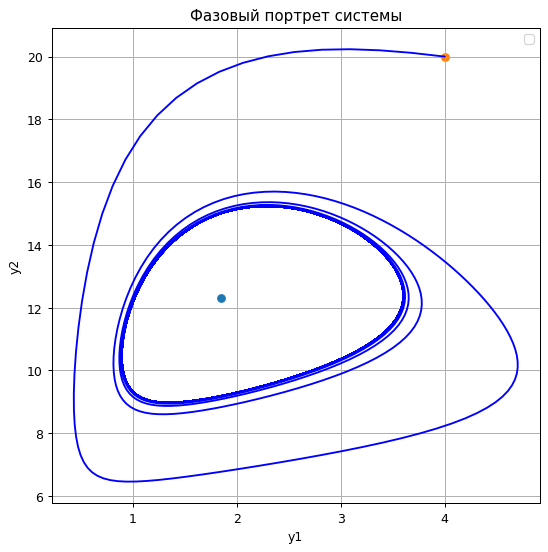

In [81]:
time = np.linspace(0, 1400, 5000)
y0 = [4, 20]

w = integr.odeint(f,                   
                  y0,           
                  time,         
                  (1, 7, 0.2, 0.1, 0.15, 1.5)         
                  )
y1 = w[:, 0]      
y2 = w[:, 1] 

plotTS(y1, y2, time)
plotFP(y1, y2, starts = [y0], centers = [[1.848, 12.321]])

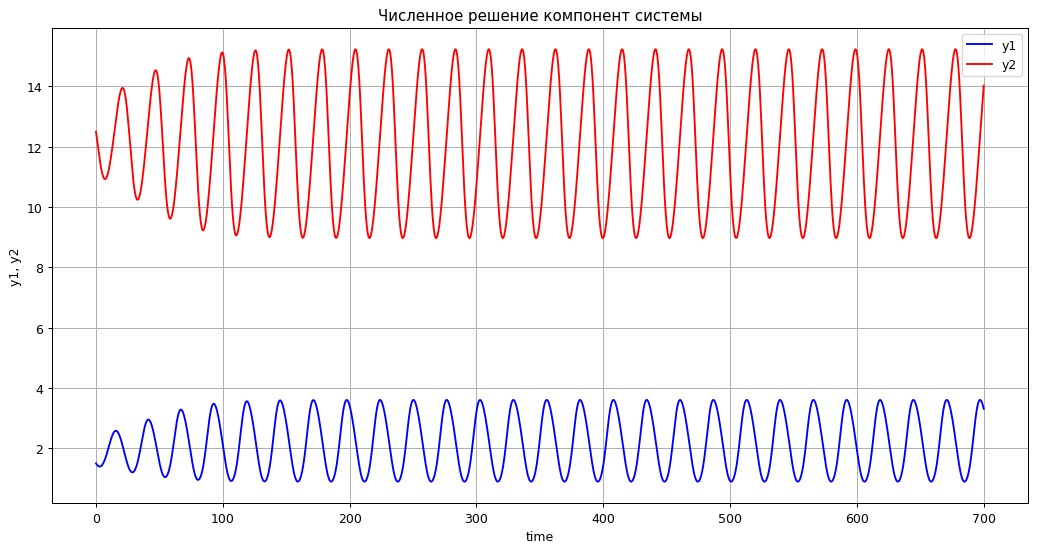

No handles with labels found to put in legend.


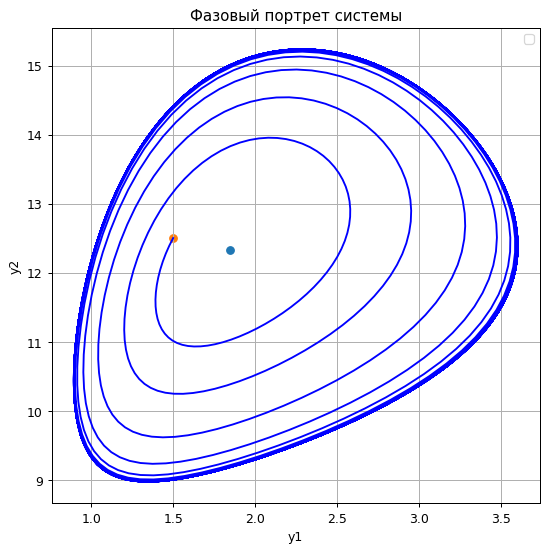

In [15]:
y0 = [1.5, 12.5]

w = integr.odeint(f,                   
                  y0,           
                  time,         
                  (1, 7, 0.2, 0.1, 0.15, 1.5)         
                  )
y1 = w[:, 0]      
y2 = w[:, 1] 

plotTS(y1, y2, time)
plotFP(y1, y2, starts = [y0], centers = [[1.848, 12.321]])